In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mplsoccer import VerticalPitch, Sbopen


# France vs Poland
MATCH_ID = 3869152

# get event and freeze frame data for game 7478
parser = Sbopen()
df_event, related, df_freeze, tactics = parser.event(MATCH_ID)

In [30]:
# a = poland['type']
# a.drop_duplicates()
# a

df_freeze.groupby('id').id.unique()

id
03ad5797-0787-4b37-9f9e-9c91d1d19bf0    [03ad5797-0787-4b37-9f9e-9c91d1d19bf0]
189cd753-a975-4179-b545-89a4e9fc2e38    [189cd753-a975-4179-b545-89a4e9fc2e38]
2d38130f-3d62-4369-8a2b-ec7866353b92    [2d38130f-3d62-4369-8a2b-ec7866353b92]
31fad68d-426e-4288-89c0-71ba4c143506    [31fad68d-426e-4288-89c0-71ba4c143506]
3b650254-e765-40a1-819e-9b67473829f3    [3b650254-e765-40a1-819e-9b67473829f3]
3dfb5a79-95c5-4e66-88fb-ddf16a823d7b    [3dfb5a79-95c5-4e66-88fb-ddf16a823d7b]
44377d04-8e4c-4a86-8fa7-02f89b98ad81    [44377d04-8e4c-4a86-8fa7-02f89b98ad81]
510bb5aa-f782-4a22-be23-8274be45b104    [510bb5aa-f782-4a22-be23-8274be45b104]
527eca36-6d4e-43e0-ba5a-ab3313ad6128    [527eca36-6d4e-43e0-ba5a-ab3313ad6128]
5dc61ca6-7468-40cf-b756-0517d2693285    [5dc61ca6-7468-40cf-b756-0517d2693285]
61add723-da40-461f-b9a1-d8d4878c2f61    [61add723-da40-461f-b9a1-d8d4878c2f61]
6501acc8-ffc7-4246-82e8-43e7a8cf7c47    [6501acc8-ffc7-4246-82e8-43e7a8cf7c47]
69bb74b1-68af-4b20-a197-0c46604b417b    [69bb74b1

In [17]:
df_freeze

,teammate,match_id,id,x,y,player_id,player_name,position_id,position_name,event_freeze_id
0,False,3869152,31fad68d-426e-4288-89c0-71ba4c143506,115.0,37.2,3637,Grzegorz Krychowiak,10,Center Defensive Midfield,1
1,False,3869152,31fad68d-426e-4288-89c0-71ba4c143506,113.8,42.8,5673,Bartosz Bereszyński,6,Left Back,2
2,False,3869152,31fad68d-426e-4288-89c0-71ba4c143506,114.5,37.7,4664,Sebastian Szymański,15,Left Center Midfield,3
3,False,3869152,31fad68d-426e-4288-89c0-71ba4c143506,112.6,36.3,4734,Matty Cash,2,Right Back,4
4,False,3869152,31fad68d-426e-4288-89c0-71ba4c143506,104.5,45.9,31955,Jakub Kamiński,12,Right Midfield,5
...,...,...,...,...,...,...,...,...,...,...
395,False,3869152,bbc46428-10c1-4bec-8eef-51410db15dba,97.6,47.7,2972,Marcus Thuram,21,Left Wing,10
396,True,3869152,bbc46428-10c1-4bec-8eef-51410db15dba,105.0,13.8,5673,Bartosz Bereszyński,6,Left Back,11
397,True,3869152,bbc46428-10c1-4bec-8eef-51410db15dba,108.1,14.6,5667,Kamil Grosicki,21,Left Wing,12
398,True,3869152,bbc46428-10c1-4bec-8eef-51410db15dba,114.8,36.1,5665,Arkadiusz Milik,19,Center Attacking Midfield,13


In [41]:
SHOT_ID = 'f814b114-cf7e-454e-8c60-8d301b5a49c9'
df_freeze_frame = df_freeze[df_freeze.id == SHOT_ID].copy()
df_shot_event = df_event[df_event.id == SHOT_ID].dropna(axis=1, how='all').copy()

In [42]:
df = pd.concat([df_shot_event[['x', 'y']], df_freeze_frame[['x', 'y']]])

x = df.x.values
y = df.y.values
teams = np.concatenate([[True], df_freeze_frame.teammate.values])

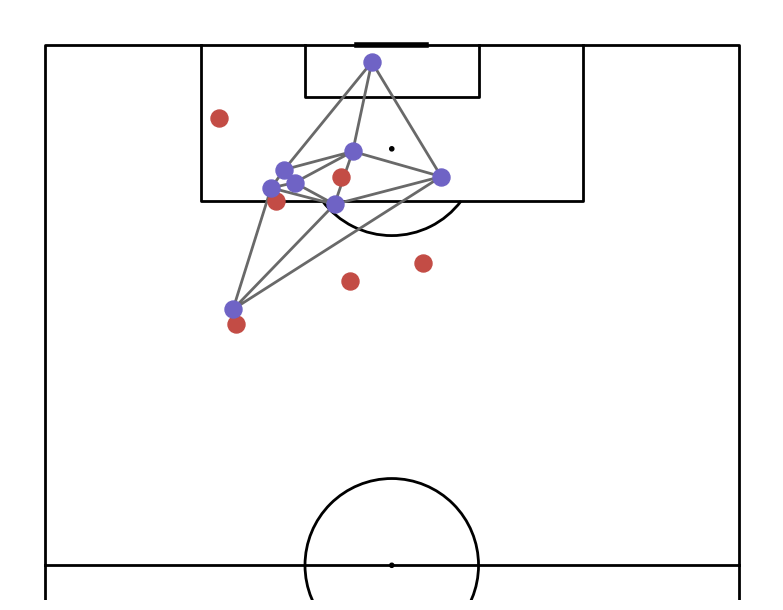

In [43]:
# draw plot
pitch = VerticalPitch(half=True, pitch_color='w', line_color='k')
fig, ax = pitch.draw(figsize=(8, 6.2))

# Get positions of Team B - which we'll use for plotting
team_b_x = x[~teams]
team_b_y = y[~teams]

# Plot triangles
t1 = pitch.triplot(team_b_x, team_b_y, ax=ax, color='dimgrey', linewidth=2)

# Plot players
sc1 = pitch.scatter(x[teams], y[teams], ax=ax, c='#c34c45', s=150, zorder=10)
sc2 = pitch.scatter(team_b_x, team_b_y, ax=ax, c='#6f63c5', s=150, zorder=10)

plt.show()  # If you are using a Jupyter notebook you do not need this line